In [2]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
from numpy.random import randn

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline


import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split

from sklearn.feature_selection import RFE   # Recursive Feature Elimination
from sklearn.svm import SVR                 # Support Vector Regression



import sklearn
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

import sklearn.datasets 
import statsmodels.formula.api as sm

In [3]:
t = pd.read_csv('values.csv')

In [4]:
t

,id,address,city,state,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleDate,lastSaleAmount,priorSaleDate,priorSaleAmount,estimated_value
0,39525749,8171 E 84th Ave,Denver,CO,80022,39.849160,-104.893468,3,2.0,6,1378,9968,2003.0,2009-12-17,75000,2004-05-13,165700.0,239753
1,184578398,10556 Wheeling St,Denver,CO,80022,39.888020,-104.830930,2,2.0,6,1653,6970,2004.0,2004-09-23,216935,NaN,NaN,343963
2,184430015,3190 Wadsworth Blvd,Denver,CO,80033,39.761710,-105.081070,3,1.0,0,1882,23875,1917.0,2008-04-03,330000,NaN,NaN,488840
3,155129946,3040 Wadsworth Blvd,Denver,CO,80033,39.760780,-105.081060,4,3.0,0,2400,11500,1956.0,2008-12-02,185000,2008-06-27,0.0,494073
4,245107,5615 S Eaton St,Denver,CO,80123,39.616181,-105.058812,3,4.0,8,2305,5600,1998.0,2012-07-18,308000,2011-12-29,0.0,513676
5,3523925,6535 W Sumac Ave,Denver,CO,80123,39.615136,-105.069018,3,5.0,7,2051,6045,1996.0,2006-09-12,363500,2005-05-16,339000.0,496062
6,30560679,6673 W Berry Ave,Denver,CO,80123,39.616350,-105.070760,4,4.0,8,2051,6315,1997.0,2014-12-15,420000,2006-07-07,345000.0,514953
7,39623928,5640 S Otis St,Denver,CO,80123,39.615213,-105.070617,3,3.0,7,2051,8133,1997.0,2004-03-15,328700,1998-04-09,225200.0,494321
8,148975825,5342 S Gray St,Denver,CO,80123,39.620158,-105.063094,3,3.0,7,1796,5038,1999.0,2011-08-16,274900,2011-01-10,0.0,496079
9,184623176,4967 S Wadsworth Blvd,Denver,CO,80123,39.626770,-105.081990,3,3.0,0,2054,4050,2007.0,2015-12-01,407000,2012-10-30,312000.0,424514


In [5]:
model = smf.ols('rooms ~ lastSaleAmount', data=t)
model = model.fit()

In [7]:
model

In [8]:
room_lastsalesamount_predit = model.predict()

In [10]:
model.params

Intercept         5.928178e+00
lastSaleAmount    5.820929e-07
dtype: float64

In [12]:
x = t['rooms']
y = t['lastSaleAmount']

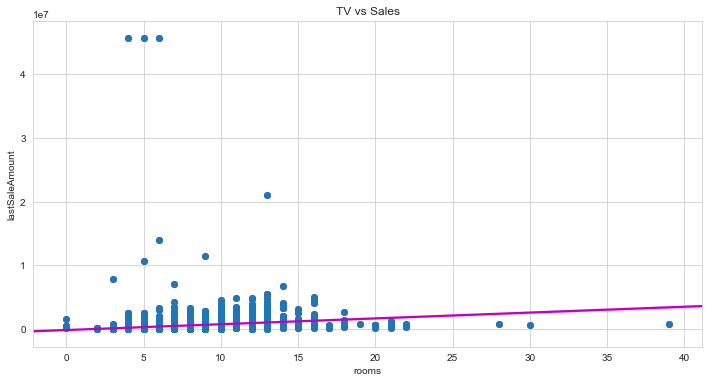

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(t['rooms'], t['lastSaleAmount'], 'o')           # scatter plot showing actual data


sns.regplot(x = 'rooms', y='lastSaleAmount', data=t, color='m', )


plt.xlabel('rooms')
plt.ylabel('lastSaleAmount')
plt.title('TV vs Sales')

plt.show()

In [15]:
new_X = 30
model.predict({"lastSaleAmount": new_X})



0    5.928196
dtype: float64

In [18]:
t.dropna(inplace=True)

In [19]:
predictors = ['rooms', 'lastSaleAmount']


In [24]:
X = t[predictors]

y = t['lotSize']

In [25]:
lm = LinearRegression()
model = lm.fit(X, y)

In [26]:
alpha = model.intercept_

In [27]:
alpha

4641.170270754736

In [28]:
betas = model.coef_

In [30]:
betas

array([1.08954896e+02, 8.92345474e-04])

# now We can predict values by simply using .predict():

In [31]:
model.predict(X)

array([5361.82556029, 4806.25418342, 5787.6518487 , ..., 6398.81974961,
       6935.38562547, 6478.41599416])

In [33]:
new_X = [[30, 2000]]
model.predict(new_X)

array([7911.6018567])

# training and testing

In [34]:
#One common method to validate a model is to split the dataset into a training dataset and a testing dataset.


#first lets predict

In [35]:
predictors = ['rooms', 'lastSaleAmount']
X = t[predictors]
Y = t['lotSize']

In [36]:

lm.predict(X)

array([5361.82556029, 4806.25418342, 5787.6518487 , ..., 6398.81974961,
       6935.38562547, 6478.41599416])

In [37]:
# Split data into training and testing sets using `train_test_split` method


trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.2, random_state=0)


In [38]:
# Initialise and fit model
lm = LinearRegression()
lm.fit(trainX, trainY)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [39]:
print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)

(8862, 2)
(2216, 2)
(8862L,)
(2216L,)


The following will display the parameters of the model:

In [40]:
betas = lm.coef_

In [41]:
betas

array([1.15831727e+02, 7.09737625e-04])

In [42]:
alpha = lm.intercept_

In [43]:
alpha

4662.452143412691

lm.coef_ returns an array with our coefficients β1 and β2.

The value of R2 can be returned simply calling .score. It turns out to be very close to the value obtained using the statsmodels method in the previous step (0.901)!

In [44]:
lm.score(trainX, trainY)

0.05394240823597107

To predict sales, pass the test predictors into .predict(). An array of 40 predictions (because there are 40 rows in the test dataset) is returned:

In [45]:
lm.predict(testX)

array([5713.87529017, 5304.98780339, 5277.09766165, ..., 5429.11891056,
       5384.12354862, 5397.75305796])

Feature selection with scikit-learn
As stated before, many statistical tools and packages have built-in methods for variable selection (feel free to review the “Multiple Regression with statsmodels” step if you need to). If done manually, feature selection is time consuming and tedious, compromising the efficiency of the model.

One advantage of using scikit-learn is that it has a method for feature selection. This method, called Recursive Feature Elimination (RFE), works similarly to backward selection.

The model is first run with all the variables and certain weights are assigned to all the variables. In the subsequent iterations, the variables with the smallest weights are pruned from the list of variables until the specified number of variables is left.

Let’s give it a go!

In [46]:
# Start with all possible predictors
predictors = ['rooms', 'lastSaleAmount',]
X = t[predictors]
Y = t['lotSize']


In [47]:

# Estimate a linear model
estimator = SVR(kernel="linear")



In [48]:
# Using RFE, specify 2 predictors for the final model
# and 1 predictor to remove at each iteration
selector = RFE(estimator, 2, step=1)


In [ ]:
selector = selector.fit(X, Y)

In [ ]:
selector.support_